In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Connect to the database (creates the file if it doesn't exist) ---
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# --- 2. Create the 'sales' table ---
try:
    cursor.execute("""
        CREATE TABLE sales (
            id INTEGER PRIMARY KEY,
            product TEXT,
            quantity INTEGER,
            price REAL
        )
    """)
    print("Table 'sales' created successfully.")
except sqlite3.OperationalError:
    # This error occurs if the table already exists, which is fine for a repeated run.
    print("Table 'sales' already exists (skipping creation).")
    pass


# --- 3. Insert sample data ---
sample_data = [
    ('Laptop', 5, 1200.00),
    ('Monitor', 10, 300.00),
    ('Mouse', 50, 25.00),
    ('Keyboard', 30, 75.00),
    ('Laptop', 3, 1200.00),
    ('Monitor', 5, 300.00)
]

# Clear existing data for a clean run (optional, but good practice)
cursor.execute("DELETE FROM sales")
conn.commit()

# Insert the new sample data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
print("Sample data inserted successfully.")

Table 'sales' created successfully.
Sample data inserted successfully.


In [3]:
# --- 4. Define the SQL Query ---
sql_query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM 
        sales 
    GROUP BY 
        product
    ORDER BY
        revenue DESC
"""

# --- 5. Run the query and load results into a Pandas DataFrame ---
# The read_sql_query function handles executing the query and fetching the data
df = pd.read_sql_query(sql_query, conn)

# Close the connection as we are done with the database
conn.close()

print("\n**SQL Query executed and data loaded into Pandas DataFrame.**")


**SQL Query executed and data loaded into Pandas DataFrame.**



### Sales Summary by Product ###
| product   |   total_qty |   revenue |
|:----------|------------:|----------:|
| Laptop    |           8 |      9600 |
| Monitor   |          15 |      4500 |
| Keyboard  |          30 |      2250 |
| Mouse     |          50 |      1250 |

Generating bar chart for Revenue...


C:\Users\Asus\AppData\Local\Temp\ipykernel_4800\1407373076.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Temp\ipykernel_4800\1407373076.py:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig("sales_revenue_chart.png")
C:\Users\Asus\anaconda3\2025 conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


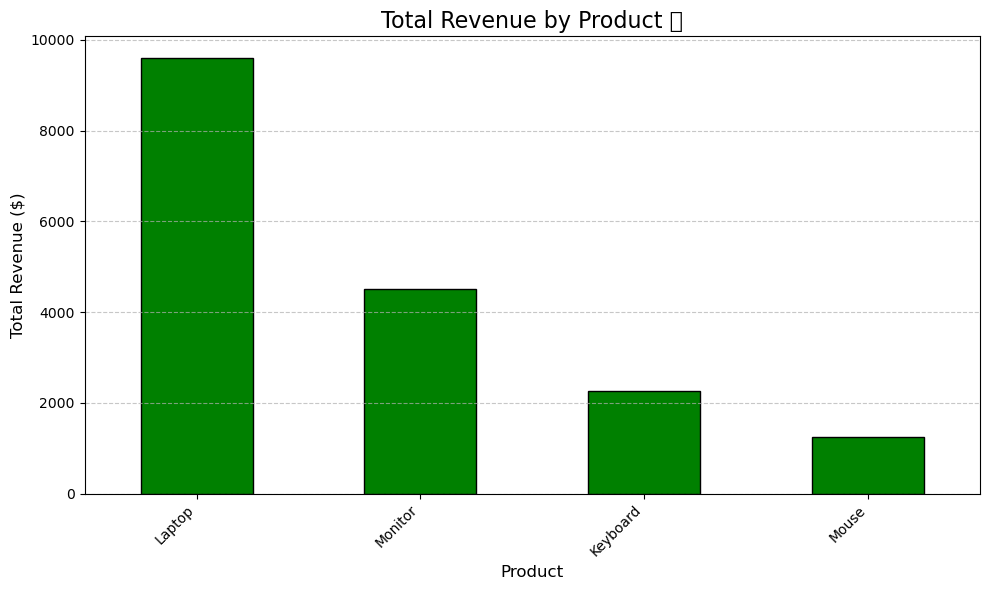

Bar chart saved as 'sales_revenue_chart.png' and displayed.

**Total Revenue Across All Products: $17,600.00**


In [5]:
# --- 6. Print the Summary Data ---
print("\n### Sales Summary by Product ###")
print(df.to_markdown(index=False)) # Using to_markdown for clean terminal output

# --- 7. Create a Simple Bar Chart for Revenue ---
print("\nGenerating bar chart for Revenue...")

# Set the product column as the index for easier plotting
df_plot = df.set_index('product')

# Create the plot
plt.figure(figsize=(10, 6))
df_plot['revenue'].plot(
    kind='bar', 
    color='green', 
    edgecolor='black'
)

# Add titles and labels
plt.title('Total Revenue by Product 💰', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate product labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show the plot
plt.savefig("sales_revenue_chart.png")
plt.show()
print("Bar chart saved as 'sales_revenue_chart.png' and displayed.")

# Display confirmation of total sales (optional)
total_revenue = df['revenue'].sum()
print(f"\n**Total Revenue Across All Products: ${total_revenue:,.2f}**")

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
!pip install tabulate

Table 'sales' created successfully.
Sample data inserted successfully.

**SQL Query executed and data loaded into Pandas DataFrame.**

### Sales Summary by Product ###
    product  total_qty  revenue
0    Laptop          8   9600.0
1   Monitor         15   4500.0
2  Keyboard         30   2250.0
3     Mouse         50   1250.0

Total Revenue Across All Products: $17,600.00

Displaying Bar Chart for Revenue...


C:\Users\Asus\AppData\Local\Temp\ipykernel_15356\4030845658.py:73: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Asus\anaconda3\2025 conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


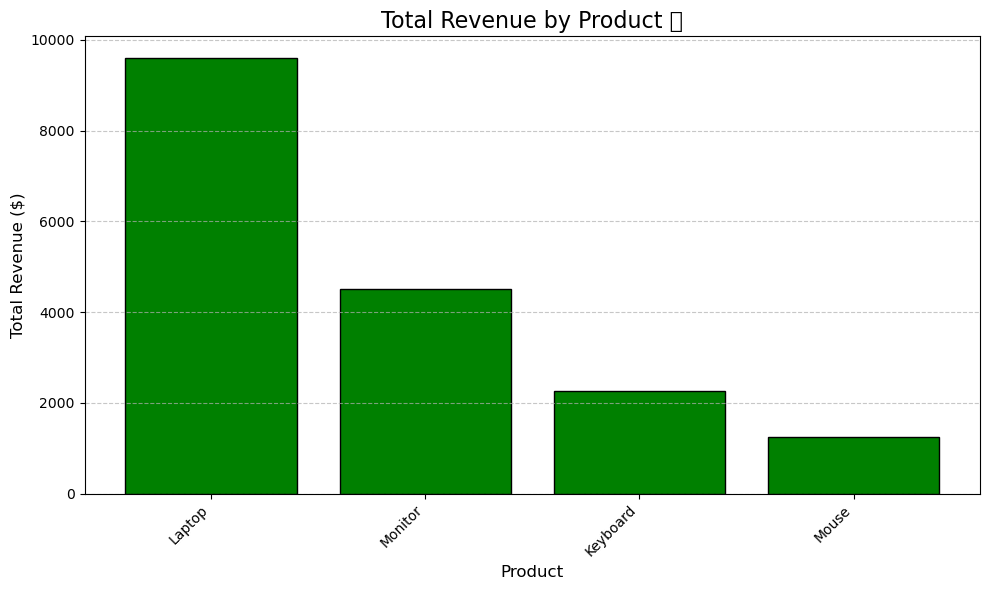


Displaying Pie Chart for Revenue Share...


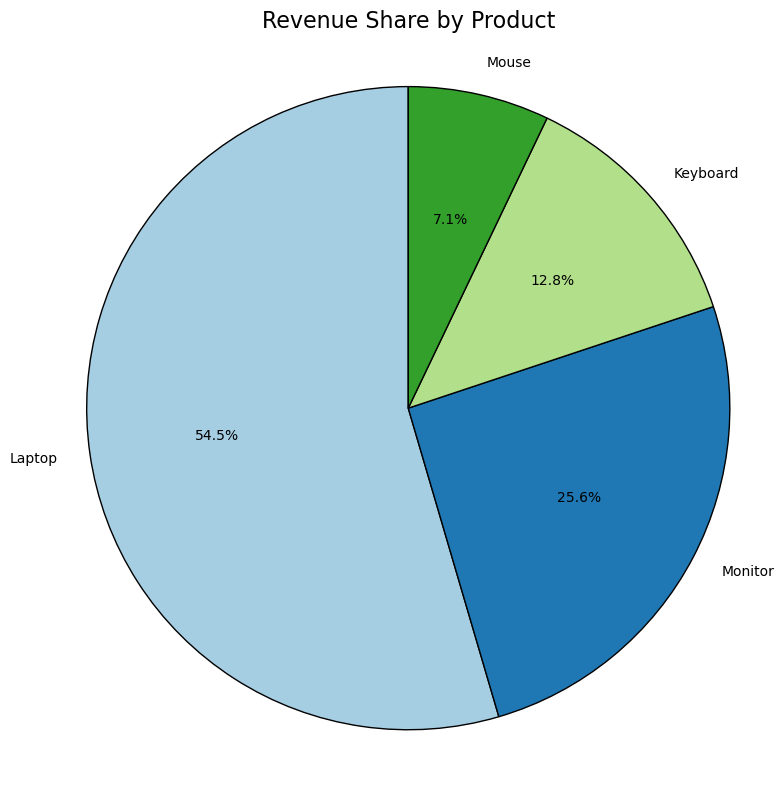


Process complete.


In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Database Connection and Setup ---
DB_FILE = "sales_data.db"
conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# Create 'sales' table (handles if it already exists)
try:
    cursor.execute("""
        CREATE TABLE sales (
            id INTEGER PRIMARY KEY,
            product TEXT,
            quantity INTEGER,
            price REAL
        )
    """)
    print("Table 'sales' created successfully.")
except sqlite3.OperationalError:
    print("Table 'sales' already exists (skipping creation).")
    pass

# Insert sample data (clearing old data first)
sample_data = [
    ('Laptop', 5, 1200.00),
    ('Monitor', 10, 300.00),
    ('Mouse', 50, 25.00),
    ('Keyboard', 30, 75.00),
    ('Laptop', 3, 1200.00),
    ('Monitor', 5, 300.00)
]
cursor.execute("DELETE FROM sales")
conn.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
print("Sample data inserted successfully.")

# --- 2. SQL Query and Data Loading ---
sql_query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM 
        sales 
    GROUP BY 
        product
    ORDER BY
        revenue DESC
"""
df = pd.read_sql_query(sql_query, conn)
conn.close()

print("\n**SQL Query executed and data loaded into Pandas DataFrame.**")

# --- 3. Print Summary Data ---
print("\n### Sales Summary by Product ###")
# Using the default print if tabulate isn't installed
print(df) 
print(f"\nTotal Revenue Across All Products: ${df['revenue'].sum():,.2f}")

# --- 4. Create and Display Bar Chart (No Saving) ---
print("\nDisplaying Bar Chart for Revenue...")
plt.figure(figsize=(10, 6))
plt.bar(df['product'], df['revenue'], color='green', edgecolor='black')

plt.title('Total Revenue by Product 💰', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Display the chart interactively

# --- 5. Create and Display Pie Chart (No Saving) ---
print("\nDisplaying Pie Chart for Revenue Share...")
plt.figure(figsize=(8, 8))
plt.pie(
    df['revenue'], 
    labels=df['product'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Revenue Share by Product', fontsize=16)
plt.axis('equal') # Ensures the pie chart is a circle.
plt.tight_layout()
plt.show() # Display the chart interactively

print("\nProcess complete.")